Dataset Naruto Shipuden

In [1]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df = pd.read_csv('naruto.csv', encoding='latin-1')
df.head(5)

,Unnamed: 0,Num_episode,Title,Type,Year_launch,Rate,Votes,Saga,Airdate
0,1,1,Homecoming,Mixed Canon/Filler,2007,8.2,728,s1 Kazekage Rescue,2007-02-15
1,2,2,The Akatsuki Makes Its Move,Mixed Canon/Filler,2007,8.0,575,s1 Kazekage Rescue,2007-02-15
2,3,3,The Results of Training,Mixed Canon/Filler,2007,8.0,508,s1 Kazekage Rescue,2007-02-22
3,4,4,The Jinchuriki of the Sand,Mixed Canon/Filler,2007,8.2,517,s1 Kazekage Rescue,2007-03-01
4,5,5,The Kazekage Stands Tall,Mixed Canon/Filler,2007,8.2,486,s1 Kazekage Rescue,2007-03-15


Entendendo a tabela (dataframe):
- Num_espisode = número do episódio
- Title = Título do episódio
- Type = Tipo do episódio (filler, cannon, etc)
- Year_launch = Ano de lançamento do episódio
- Rate = Nota média daquele respectivo episódio
- Votes = Votos para o respectivo episódio
- Saga = Temporada
- Airdate = Data exata da exibição do episódio
- Unnamed: 0 = Coluna sem definição que será descartada

## Análise exploratória básica

In [3]:
# Excluindo a primeira coluna sem informação relevante
df.drop('Unnamed: 0', axis=1, inplace = True)

# Realizando descrição de dados para entender o tipo de valores inputados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_episode  500 non-null    int64  
 1   Title        500 non-null    object 
 2   Type         500 non-null    object 
 3   Year_launch  500 non-null    int64  
 4   Rate         500 non-null    float64
 5   Votes        500 non-null    int64  
 6   Saga         500 non-null    object 
 7   Airdate      500 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB


In [4]:
# Resumo estatístico
df.describe()

,Num_episode,Year_launch,Rate,Votes
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2011.668000,7.360600,369.586000
std,144.481833,2.899412,1.056836,271.742906
min,1.000000,2007.000000,4.200000,163.000000
25%,125.750000,2009.000000,6.500000,216.750000
50%,250.500000,2012.000000,7.500000,294.500000
75%,375.250000,2014.000000,8.200000,395.500000
max,500.000000,2017.000000,9.500000,2780.000000


In [5]:
# Verificando quantas linhas são com valores nulos (podem interferir nas análises)
null = df.isna().sum()
null

Num_episode    0
Title          0
Type           0
Year_launch    0
Rate           0
Votes          0
Saga           0
Airdate        0
dtype: int64

In [6]:
# Verificando quantas linhas são duplicadas
duplicated = df.duplicated().sum()
duplicated

0

## Distribuição dos tipos de episódios

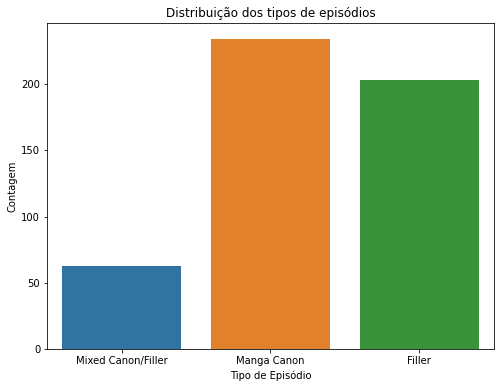

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type')
plt.title('Distribuição dos tipos de episódios')
plt.xlabel('Tipo de Episódio')
plt.ylabel('Contagem')
plt.show()

## Relação entre Avaliação e Número de Votos

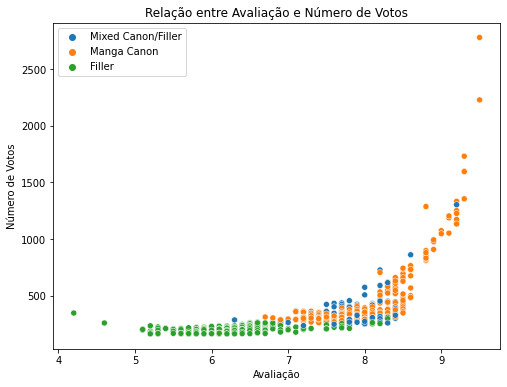

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rate', y='Votes', hue='Type')
plt.title('Relação entre Avaliação e Número de Votos')
plt.xlabel('Avaliação')
plt.ylabel('Número de Votos')
plt.legend()
plt.show()

In [9]:
# Calculando a média de avaliação por tipo de episódio
average_rate_by_type = df.groupby('Type')['Rate'].mean().sort_values(ascending=False)

# Imprimindo a média de avaliação por tipo de episódio
print(average_rate_by_type)

Type
Manga Canon           8.116239
Mixed Canon/Filler    7.868254
Filler                6.332020
Name: Rate, dtype: float64


Observações: A quantidade de espisódios Fillers e Canon são quase iguais, porém além dos eps Canon obter mais votos, também possuem a maior taxa de avaliação (8,1).

In [10]:
# Criando uma matriz de avaliações (usuários x episódios)
ratings = df.pivot_table(index='Title', columns='Num_episode', values='Rate')

## Modelo de recomendação simples

Passos:
1. Agrupar os episódios por tipo e calcular a média das avaliações (Rate) para cada tipo.
2. Classificar os tipos de episódios em ordem decrescente com base nas avaliações médias.
3. Recomendar os episódios do tipo com as melhores avaliações médias.

In [11]:
# 1 e 2 = feito anteriormente, salvo o resultado na variavel: average_rate_by_type


In [12]:
# 3

# Função para recomendar episódios por tipo
def recommend_episodes_by_type(df, type, num_recommendations=3):
    recommended_episodes = df[df['Type'] == type].sort_values(by='Rate', ascending=False).head(num_recommendations)
    return recommended_episodes

recommended_episodes = recommend_episodes_by_type(df, 'Filler', num_recommendations=3)['Title']
print("Episódios de filler mais recomendados:")
print(recommended_episodes)

Episódios de filler mais recomendados:
357    Kakashi: Shadow of the ANBU Black Ops  Coup D...
467                                        The Successor
347                                     The New Akatsuki
Name: Title, dtype: object


In [14]:
recommended_episodes = recommend_episodes_by_type(df, 'Manga Canon', num_recommendations=3)['Title']
print("Episódios de Canon mais recomendados:")
print(recommended_episodes)

Episódios de Canon mais recomendados:
476                  Naruto and Sasuke
132    The Tale of Jiraiya the Gallant
475                   The Final Battle
Name: Title, dtype: object
